# Performance of Students In Exams

## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
exams = pd.read_csv('StudentsPerformance.csv')

## Exploring

In [3]:
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- Rename the colume race/ethnicity to be groups to be easier in handling

In [8]:
d= {'race/ethnicity':'group'}
exams.rename(columns=d,inplace=True)

- Rename the colume [parental level of education, test preparation course,math score,reading score,writing score] to be groups to be easier in handling

In [10]:
d={'parental level of education':'parent_education','test preparation course':'test_preparation_course','math score':'math_score','reading score':'reading_score','writing score':'writing_score'}
exams.rename(columns=d,inplace=True)

- Getting Total Score as average of the 3 available scores

In [18]:
exams['total_score'] = (exams.math_score+exams.reading_score+exams.writing_score)/3

In [19]:
exams.describe()

,math_score,reading_score,writing_score,total_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


# Exploration-Plots

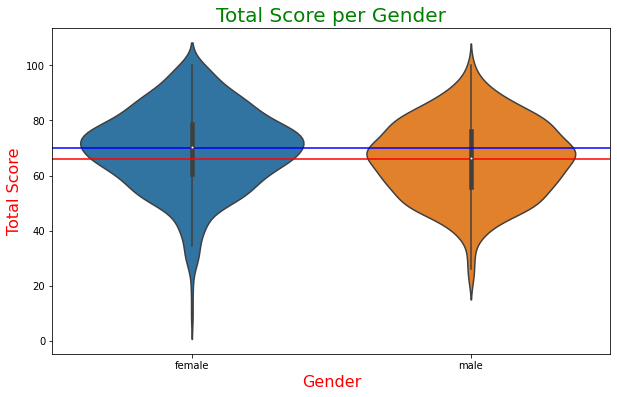

In [46]:
plt.figure(figsize = [10,6])
sb.violinplot(data=exams,x='gender',y='total_score')
plt.xlabel('Gender', color='r',size=16)
plt.ylabel('Total Score', color='r',size=16)
plt.title('Total Score per Gender', color='g',size=20)
plt.axhline(70,color='b')
plt.axhline(66,color='r');

- Females have higher total score mode than the male
- Males have higher proability to have min total score than females

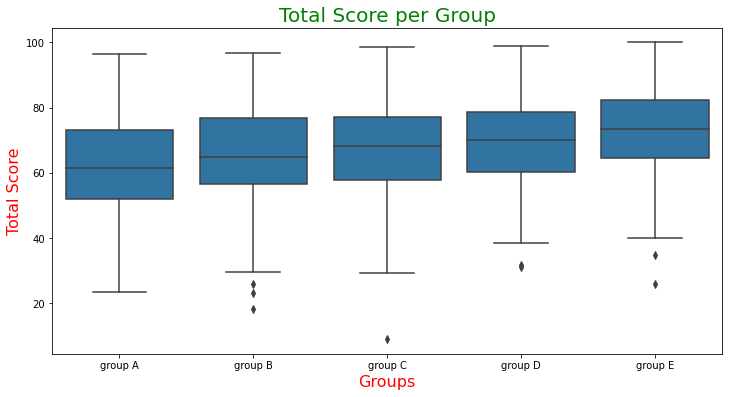

In [54]:
plt.figure(figsize = [12,6])
groups=['group A','group B','group C','group D','group E']
sb.boxplot(data=exams,x='group',y='total_score', color=sb.color_palette()[0], order=groups)
plt.xlabel('Groups', color='r',size=16)
plt.ylabel('Total Score', color='r',size=16)
plt.title('Total Score per Group', color='g',size=20);

- Group E has the highest averahe and mode scores, while group A has the least
- the Groups seems to be divided according to the student levels, groups A is the least with Group E is the best

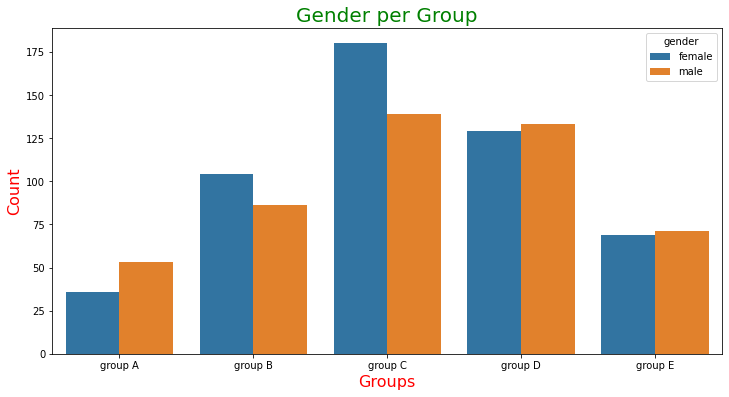

In [87]:
plt.figure(figsize = [12,6])
sb.countplot(data=exams, x='group',hue='gender', order=groups)
plt.xlabel('Groups', color='r',size=16)
plt.ylabel('Count', color='r',size=16)
plt.title('Gender per Group', color='g',size=20);

- Group C has the highest number of students
- Group A has the lease number of students
- In light of what introduced before, That groups are categorized according to the student's levels - this can be seen as Group E and Group A has the least number of students , while Groups c has the highest number with the average total score nearest to the mean - Normal distribution

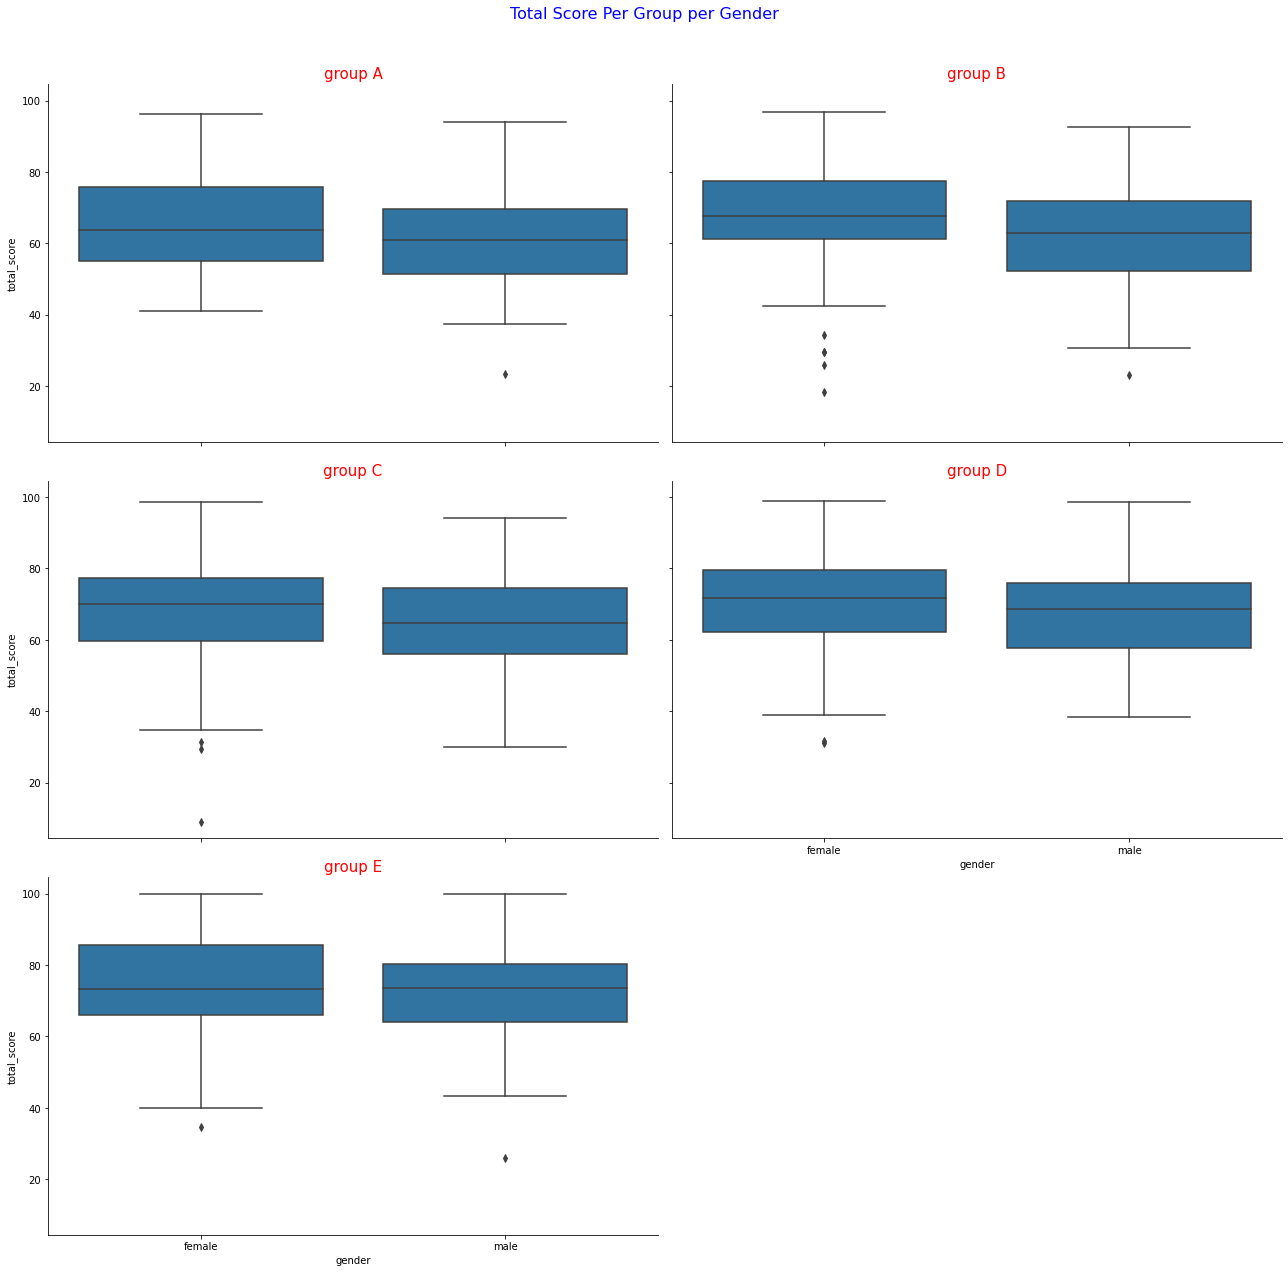

In [139]:
g= sb.FacetGrid(data=exams,col='group', height=6,aspect=1.5, col_wrap=2, col_order=groups)
g.map(sb.boxplot,'gender','total_score',order=['female','male'])
g.set_titles(col_template="{col_name}",size=15, color='r');
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Total Score Per Group per Gender', size=16, color='b');

- Despite Females are the larger count per group, but they holds the best scores in each group

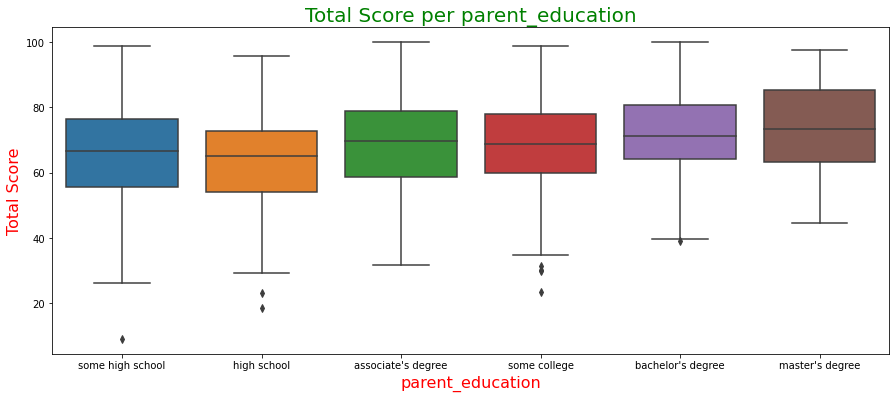

In [150]:
plt.figure(figsize = [15,6])
parents=[ 'some high school', 'high school', "associate's degree",'some college',"bachelor's degree", "master's degree"]
sb.boxplot(data=exams,x='parent_education',y='total_score',order=parents)
plt.xlabel('parent_education', color='r',size=16)
plt.ylabel('Total Score', color='r',size=16)
plt.title('Total Score per parent_education', color='g',size=20);

- seems that the parents education affects the total scores of the students, Master degree has the highest mode and highest min

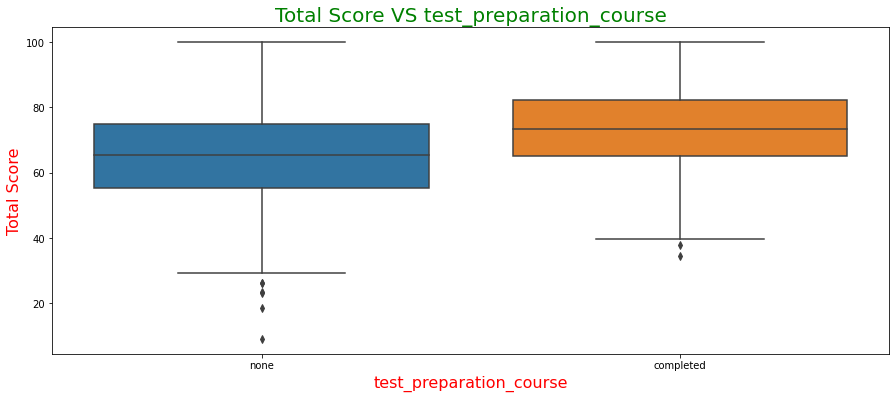

In [152]:
plt.figure(figsize = [15,6])
sb.boxplot(data=exams,x='test_preparation_course',y='total_score')
plt.xlabel('test_preparation_course', color='r',size=16)
plt.ylabel('Total Score', color='r',size=16)
plt.title('Total Score VS test_preparation_course', color='g',size=20);

- Definetely, completing the test preparation course guaranetees a higher total score.
- it is guranteed because the min score in completed coursed is largetr than the mode of the non-completed

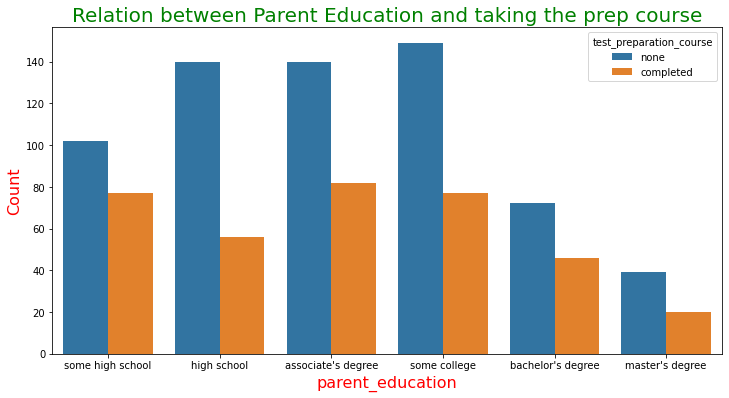

In [156]:
plt.figure(figsize = [12,6])
sb.countplot(data=exams, x='parent_education',hue='test_preparation_course',order=parents)
plt.xlabel('parent_education', color='r',size=16)
plt.ylabel('Count', color='r',size=16)
plt.title('Relation between Parent Education and taking the prep course', color='g',size=20);

- Apparently, that the parent degree doesn't affect the proability for the student to take the preparation course

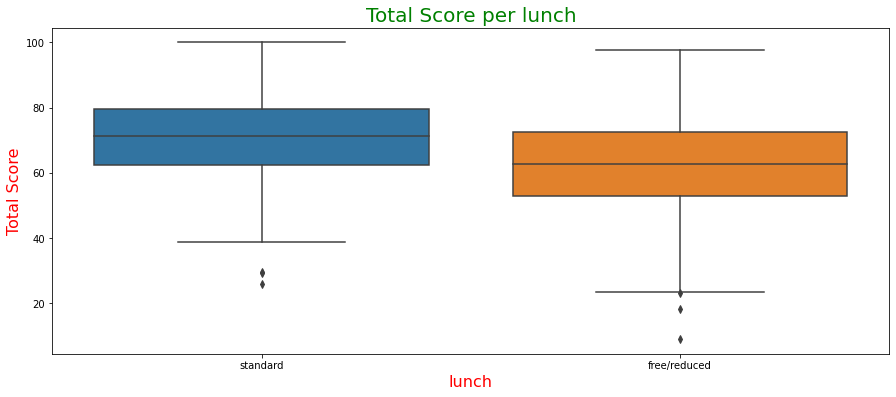

In [158]:
plt.figure(figsize = [15,6])
sb.boxplot(data=exams,x='lunch',y='total_score')
plt.xlabel('lunch', color='r',size=16)
plt.ylabel('Total Score', color='r',size=16)
plt.title('Total Score per lunch', color='g',size=20);

- it is recommended to have standard lunch for better total Scored

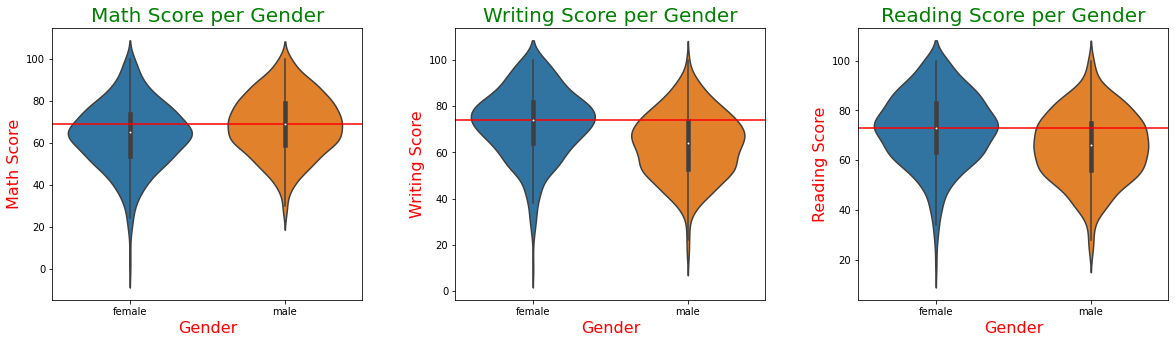

In [198]:
f, axs = plt.subplots(2,2,figsize=(20,5))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,3,1)
sb.violinplot(data=exams,x='gender',y='math_score',height=6,aspect=1.5)
plt.xlabel('Gender', color='r',size=16)
plt.ylabel('Math Score', color='r',size=16)
plt.title('Math Score per Gender', color='g',size=20)
plt.axhline(69,color='r');

plt.subplot(1,3,2)
sb.violinplot(data=exams,x='gender',y='writing_score',height=6,aspect=1.5)
plt.xlabel('Gender', color='r',size=16)
plt.ylabel('Writing Score', color='r',size=16)
plt.title('Writing Score per Gender', color='g',size=20)
plt.axhline(74,color='r');

plt.subplot(1,3,3)
sb.violinplot(data=exams,x='gender',y='reading_score',height=6,aspect=1.5)
plt.xlabel('Gender', color='r',size=16)
plt.ylabel('Reading Score', color='r',size=16)
plt.title('Reading Score per Gender', color='g',size=20)
plt.axhline(73,color='r');

- Males are better in math but worst in Writing and reading than females
- This explains why females always outperform males

# Conclusion

- <span style="color:red"><font size="4"> Females have better Overall Scores than Males </font></span>

- <span style="color:red"><font size="4"> Females have better Scores in reading and writing than Males </font></span>

- <span style="color:blue"><font size="4"> Students are categorized in groups according to their cleverness </font></span>

- <span style="color:purple"><font size="4"> Parent education has no impact on students groupig nor taking the preparation score </font></span>

- <span style="color:purple"><font size="4"> but Parent education seems to have impact on the total scores </font></span>

- <span style="color:green"><font size="4"> Taking a preparation course will definetely impact the overall scores </font></span>

- <span style="color:green"><font size="4"> Having standard lunch will definetely impact the overall scores </font></span>